In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
path20="/content/drive/My Drive/bitsproj/ASIANPAINT.NS.csv"
path19="/content/drive/My Drive/bitsproj/ASIANPAINT.NS 2019.csv"

In [4]:
df20 = pd.read_csv(path20)
df19 = pd.read_csv(path19)

In [5]:
df20.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,1777.0,1777.000000,1678.150024,1683.400024,1681.910889,2867336
1,2020-03-17,1699.0,1779.800049,1670.000000,1731.599976,1730.068237,2643189
2,2020-03-18,1732.0,1758.550049,1608.000000,1618.199951,1616.768555,3676437
3,2020-03-19,1540.0,1653.949951,1431.199951,1601.199951,1599.783569,4906644
4,2020-03-20,1610.0,1757.400024,1570.550049,1742.949951,1741.408203,3128629


In [6]:
df19.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-15,1434.0,1457.000000,1428.650024,1432.550049,1415.286621,1667627
1,2019-03-18,1446.0,1460.599976,1436.599976,1445.599976,1428.179321,1148000
2,2019-03-19,1442.0,1459.849976,1440.000000,1453.900024,1436.379272,886660
3,2019-03-20,1462.0,1466.000000,1448.500000,1456.150024,1438.602295,764625
4,2019-03-22,1459.0,1479.900024,1452.599976,1471.250000,1453.520264,1380404


In [7]:
df20.shape

(146, 7)

In [8]:
df19['newda'] = [df19['Date'][i][5:] for i in range(139)]
df20['newda'] = [df20['Date'][i][5:] for i in range(146)]
df19.head()

,Date,Open,High,Low,Close,Adj Close,Volume,newda
0,2019-03-15,1434.0,1457.000000,1428.650024,1432.550049,1415.286621,1667627,03-15
1,2019-03-18,1446.0,1460.599976,1436.599976,1445.599976,1428.179321,1148000,03-18
2,2019-03-19,1442.0,1459.849976,1440.000000,1453.900024,1436.379272,886660,03-19
3,2019-03-20,1462.0,1466.000000,1448.500000,1456.150024,1438.602295,764625,03-20
4,2019-03-22,1459.0,1479.900024,1452.599976,1471.250000,1453.520264,1380404,03-22


In [9]:
df_in = pd.merge(df19,df20,on='newda',how='inner')
df_in.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,newda,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2019-03-18,1446.000000,1460.599976,1436.599976,1445.599976,1428.179321,1148000,03-18,2020-03-18,1732.000000,1758.550049,1608.000000,1618.199951,1616.768555,3676437
1,2019-03-19,1442.000000,1459.849976,1440.000000,1453.900024,1436.379272,886660,03-19,2020-03-19,1540.000000,1653.949951,1431.199951,1601.199951,1599.783569,4906644
2,2019-03-20,1462.000000,1466.000000,1448.500000,1456.150024,1438.602295,764625,03-20,2020-03-20,1610.000000,1757.400024,1570.550049,1742.949951,1741.408203,3128629
3,2019-03-25,1465.099976,1475.599976,1451.500000,1457.550049,1439.985474,848078,03-25,2020-03-25,1446.550049,1605.349976,1446.000000,1593.150024,1591.740723,2196415
4,2019-03-26,1460.500000,1492.250000,1460.500000,1485.050049,1467.154175,1630147,03-26,2020-03-26,1605.000000,1650.000000,1574.000000,1616.949951,1615.519653,2622118


In [10]:
ndf19=pd.DataFrame(df_in,columns=['Date_x','Open_x','High_x',	'Low_x','Close_x','Adj Close_x','Volume_x'])
ndf19.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x
0,2019-03-18,1446.000000,1460.599976,1436.599976,1445.599976,1428.179321,1148000
1,2019-03-19,1442.000000,1459.849976,1440.000000,1453.900024,1436.379272,886660
2,2019-03-20,1462.000000,1466.000000,1448.500000,1456.150024,1438.602295,764625
3,2019-03-25,1465.099976,1475.599976,1451.500000,1457.550049,1439.985474,848078
4,2019-03-26,1460.500000,1492.250000,1460.500000,1485.050049,1467.154175,1630147


In [11]:
ndf20=pd.DataFrame(df_in,columns=['Date_y','Open_y','High_y',	'Low_y','Close_y','Adj Close_y','Volume_y'])
ndf20.head()

,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2020-03-18,1732.000000,1758.550049,1608.000000,1618.199951,1616.768555,3676437
1,2020-03-19,1540.000000,1653.949951,1431.199951,1601.199951,1599.783569,4906644
2,2020-03-20,1610.000000,1757.400024,1570.550049,1742.949951,1741.408203,3128629
3,2020-03-25,1446.550049,1605.349976,1446.000000,1593.150024,1591.740723,2196415
4,2020-03-26,1605.000000,1650.000000,1574.000000,1616.949951,1615.519653,2622118


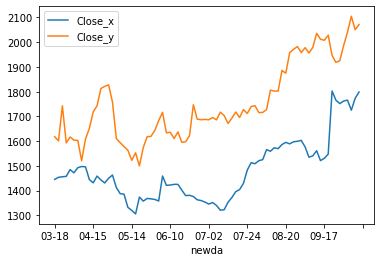

In [12]:
df_in.plot(x='newda',y=["Close_x","Close_y"])


In [13]:
daily_close19 = df_in[["Adj Close_x"]]
daily_log_returns19 = np.log(daily_close19.pct_change()+1)
daily_log_returns19.fillna(0, inplace=True)
print(daily_log_returns19)
daily_close20 = df_in[["Adj Close_y"]]
daily_log_returns20 = np.log(daily_close20.pct_change()+1)
daily_log_returns20.fillna(0, inplace=True)
print(daily_log_returns20)

    Adj Close_x
0      0.000000
1      0.005725
2      0.001546
3      0.000961
4      0.018692
..          ...
75     0.005891
76     0.002239
77    -0.023460
78     0.027613
79     0.014137

[80 rows x 1 columns]
    Adj Close_y
0      0.000000
1     -0.010561
2      0.084826
3     -0.089866
4      0.014828
..          ...
75     0.031086
76     0.026846
77     0.031145
78    -0.026183
79     0.010068

[80 rows x 1 columns]


In [14]:
daily_pct_change19 = daily_close19 / daily_close19.shift(1) - 1
daily_pct_change19.fillna(0, inplace=True)
print(daily_pct_change19)
daily_pct_change20 = daily_close20 / daily_close20.shift(1) - 1
daily_pct_change20.fillna(0, inplace=True)
print(daily_pct_change20)

    Adj Close_x
0      0.000000
1      0.005742
2      0.001548
3      0.000961
4      0.018867
..          ...
75     0.005908
76     0.002242
77    -0.023187
78     0.027998
79     0.014238

[80 rows x 1 columns]
    Adj Close_y
0      0.000000
1     -0.010506
2      0.088527
3     -0.085946
4      0.014939
..          ...
75     0.031575
76     0.027210
77     0.031635
78    -0.025843
79     0.010119

[80 rows x 1 columns]


In [15]:
daily_pct_changen19 = daily_pct_change19.to_numpy()
daily_pct_changen20 = daily_pct_change20.to_numpy()

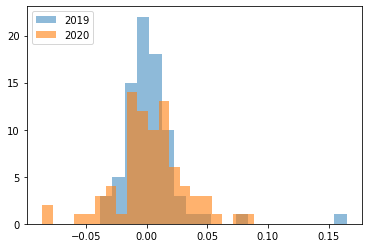

In [16]:
plt.hist(daily_pct_changen19,bins=20,label='2019',alpha=0.5)
plt.hist(daily_pct_changen20,bins=20,label='2020',alpha=0.6)
plt.legend(loc='upper left')
plt.show()

In [17]:
print(daily_pct_change19.describe())

       Adj Close_x
count    80.000000
mean      0.003102
std       0.025312
min      -0.038392
25%      -0.008707
50%       0.000879
75%       0.009044
max       0.164755


In [18]:
print(daily_pct_change20.describe())

       Adj Close_y
count    80.000000
mean      0.003519
std       0.029048
min      -0.085946
25%      -0.010240
50%       0.001672
75%       0.017053
max       0.088527


In [19]:
cum_daily_return19 = (1 + daily_pct_change19).cumprod()
print(cum_daily_return19)

    Adj Close_x
0      1.000000
1      1.005742
2      1.007298
3      1.008267
4      1.027290
..          ...
75     1.225552
76     1.228299
77     1.199819
78     1.233411
79     1.250972

[80 rows x 1 columns]


In [20]:
cum_daily_return20 = (1 + daily_pct_change20).cumprod()
print(cum_daily_return20)

    Adj Close_y
0      1.000000
1      0.989494
2      1.077092
3      0.984520
4      0.999228
..          ...
75     1.228624
76     1.262054
77     1.301980
78     1.268332
79     1.281167

[80 rows x 1 columns]


In [21]:
dta = [df_in['newda'],cum_daily_return19,cum_daily_return20]
exdf = pd.concat(dta,axis=1)
exdf = exdf.rename(columns={'newda':"Date",'Adj Close_x':'2019','Adj Close_y':'2020'})
exdf

,Date,2019,2020
0,03-18,1.000000,1.000000
1,03-19,1.005742,0.989494
2,03-20,1.007298,1.077092
3,03-25,1.008267,0.984520
4,03-26,1.027290,0.999228
...,...,...,...
75,09-30,1.225552,1.228624
76,10-01,1.228299,1.262054
77,10-07,1.199819,1.301980
78,10-09,1.233411,1.268332


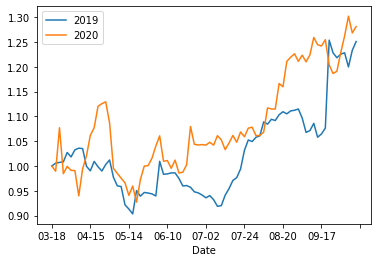

In [22]:
exdf.plot(x='Date',y=["2019","2020"] )

In [23]:
adj_close_px19 = ndf19['Adj Close_x']
moving_avg19 = adj_close_px19.rolling(window=40).mean()
print(moving_avg19[-10:])

70    1458.774332
71    1462.000015
72    1471.559094
73    1480.596701
74    1489.827997
75    1499.288989
76    1508.972226
77    1517.962650
78    1528.230682
79    1539.277197
Name: Adj Close_x, dtype: float64


In [24]:
adj_close_px20 = ndf20['Adj Close_y']
moving_avg20 = adj_close_px20.rolling(window=40).mean()
print(moving_avg20[-10:])

70    1780.240912
71    1790.721530
72    1798.487741
73    1806.596771
74    1814.827106
75    1823.960489
76    1831.329129
77    1841.766480
78    1850.900034
79    1860.521115
Name: Adj Close_y, dtype: float64


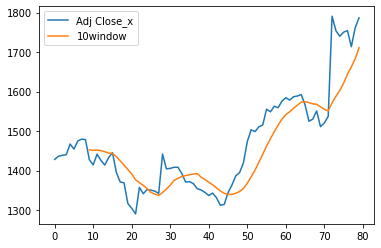

In [25]:
adj_close_px19 = ndf19['Adj Close_x']
ndf19['10window'] = adj_close_px19.rolling(window=10).mean()
ndf19[['Adj Close_x','10window']].plot()
plt.show()